In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from pygam import LinearGAM, s, te, f, l

In [2]:
df = pd.read_csv('fanfic_regression_data_log.tsv', sep = '\t')

In [3]:
len(df)

609812

### GAM

In [6]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(how = 'any')

In [7]:
len(df)

609716

In [77]:
form = s(df.columns.get_loc('Term_novelty'), n_splines=20, lam=0.01) + s(df.columns.get_loc('Topic_novelty'), n_splines=15, lam=0.01) + s(df.columns.get_loc('Chapters'))+ s(df.columns.get_loc('History')) + s(df.columns.get_loc('Words'))\
+ l(df.columns.get_loc('Category_F_M')) + l(df.columns.get_loc('Category_Gen')) \
        + l(df.columns.get_loc('Category_M_M')) + l(df.columns.get_loc('Category_Multi')) + l(df.columns.get_loc('Category_Other')) +l(df.columns.get_loc('Category_Unknown')) + \
        l(df.columns.get_loc('ArchiveWarnings_underage')) + l(df.columns.get_loc('ArchiveWarnings_death')) + l(df.columns.get_loc('ArchiveWarnings_choose_no')) + \
       l(df.columns.get_loc('ArchiveWarnings_violence')) + l(df.columns.get_loc('ArchiveWarnings_noncon')) + s(df.columns.get_loc('author_fic_cnt')) + l(df.columns.get_loc('Rating_G'))\
      + l(df.columns.get_loc('Rating_M')) + l(df.columns.get_loc('Rating_N')) + l(df.columns.get_loc('Rating_T')) + l(df.columns.get_loc('Freq_relationship')) + l(df.columns.get_loc('Fandom_dcu')) + l(df.columns.get_loc('Fandom_doctor_who'))\
    + l(df.columns.get_loc('Fandom_star_wars')) + l(df.columns.get_loc('Fandom_arthurian')) + l(df.columns.get_loc('Fandom_supernatural')) + l(df.columns.get_loc('Fandom_haikyuu')) + \
       l(df.columns.get_loc('Fandom_kuroko_no_basuke')) + l(df.columns.get_loc('Fandom_hamilton_miranda')) + l(df.columns.get_loc('Fandom_dragon_age'))\
    + l(df.columns.get_loc('Fandom_the_walking_dead')) + l(df.columns.get_loc('Fandom_buffy')) + l(df.columns.get_loc('Fandom_les_miserables')) + \
    l(df.columns.get_loc('Fandom_naruto')) + l(df.columns.get_loc('Fandom_tolkien')) + l(df.columns.get_loc('Fandom_shakespare')) + l(df.columns.get_loc('Fandom_hetalia')) + \
    l(df.columns.get_loc('Fandom_attack_on_titan')) + l(df.columns.get_loc('Fandom_ms_paint_adventures')) + l(df.columns.get_loc('Fandom_marvel')) + \
       l(df.columns.get_loc('Fandom_sailor_moon')) + l(df.columns.get_loc('Fandom_one_direction')) + l(df.columns.get_loc('Fandom_sherlock')) 

In [78]:
vals = df.to_numpy(copy=True).astype('float')

In [79]:
gam_kudos = LinearGAM(form).fit(vals, df['Kudos'])

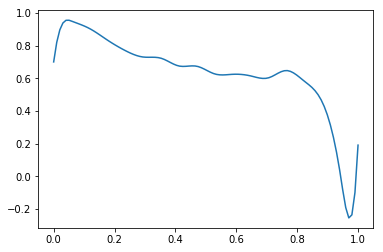

In [80]:
i = 0
XX = gam_kudos.generate_X_grid(term=i,n=100)
plt.plot(np.linspace(0,1,100), gam_kudos.partial_dependence(term=i))
# plt.plot(gam_kudos.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')

In [69]:
gam_hits = LinearGAM(form).fit(vals, df['Hits'])

In [70]:
gam_comments = LinearGAM(form).fit(vals, df['Comments'])

In [71]:
gam_bookmarks = LinearGAM(form).fit(vals, df['Bookmarks'])

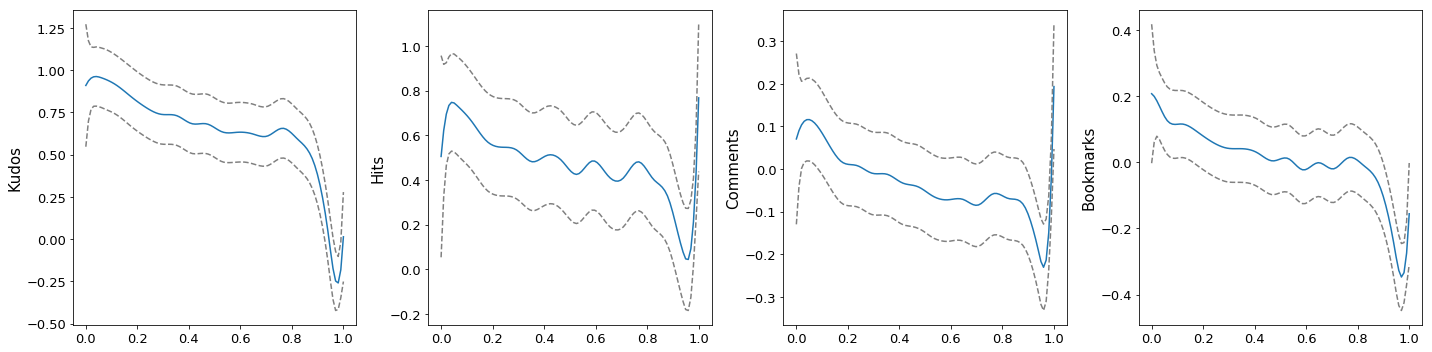

In [72]:
plt.figure(figsize = (20, 5))

plt.subplot(1,4,1)
X1 = gam_kudos.generate_X_grid(term=0,n=100)
plt.plot(np.linspace(0,1,100), gam_kudos.partial_dependence(term=0, X=X1))
plt.plot(np.linspace(0,1,100), gam_kudos.partial_dependence(term=0, X=X1, width=.95)[1], c='grey', ls='--')
plt.ylabel('Kudos', fontsize=15)
plt.tick_params(labelsize=13)


plt.subplot(1,4,2)
X2 = gam_hits.generate_X_grid(term=0,n=100)
plt.plot(np.linspace(0,1,100), gam_hits.partial_dependence(term=0, X=X2))
plt.plot(np.linspace(0,1,100), gam_hits.partial_dependence(term=0, X=X2, width=.95)[1], c='grey', ls='--')
plt.ylabel('Hits', fontsize=15)
plt.tick_params(labelsize=13)

plt.subplot(1,4,3)
X3 = gam_comments.generate_X_grid(term=0,n=100)
plt.plot(np.linspace(0,1,100), gam_comments.partial_dependence(term=0, X=X3))
plt.plot(np.linspace(0,1,100), gam_comments.partial_dependence(term=0, X=X3, width=.95)[1], c='grey', ls='--')
plt.ylabel('Comments', fontsize=15)
plt.tick_params(labelsize=13)

plt.subplot(1,4,4)
X4 = gam_bookmarks.generate_X_grid(term=0,n=100)
plt.plot(np.linspace(0,1,100), gam_bookmarks.partial_dependence(term=0, X=X4))
plt.plot(np.linspace(0,1,100), gam_bookmarks.partial_dependence(term=0, X=X4, width=.95)[1], c='grey', ls='--')
plt.ylabel('Bookmarks', fontsize=15)
plt.tick_params(labelsize=13)

plt.tight_layout()
# plt.savefig('gam_results_term_20_300.pdf', type = 'pdf')

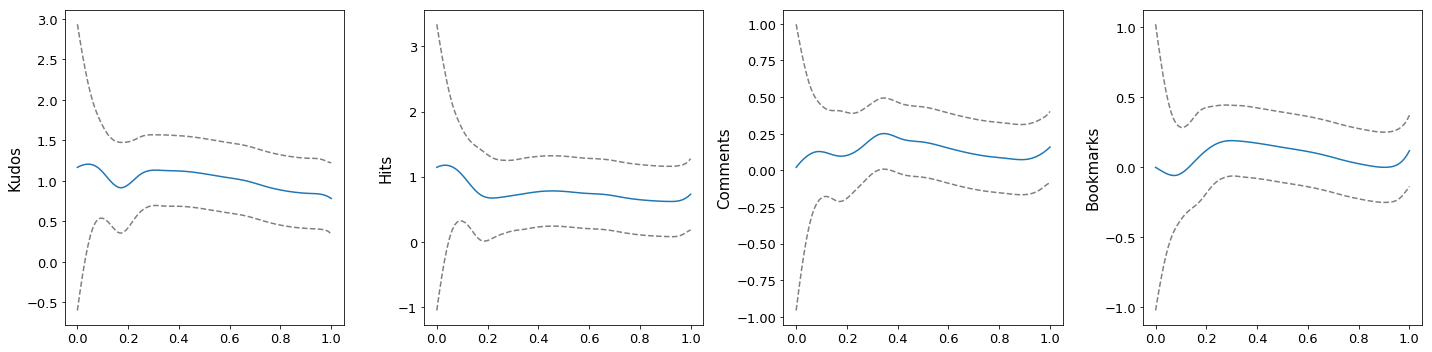

In [73]:
plt.figure(figsize = (20, 5))

plt.subplot(1,4,1)
X1 = gam_kudos.generate_X_grid(term=1,n=100)
plt.plot(np.linspace(0,1,100), gam_kudos.partial_dependence(term=1, X=X1))
plt.plot(np.linspace(0,1,100), gam_kudos.partial_dependence(term=1, X=X1, width=.95)[1], c='grey', ls='--')
plt.ylabel('Kudos', fontsize=15)
plt.tick_params(labelsize=13)

plt.subplot(1,4,2)
X2 = gam_hits.generate_X_grid(term=1,n=100)
plt.plot(np.linspace(0,1,100), gam_hits.partial_dependence(term=1, X=X2))
plt.plot(np.linspace(0,1,100), gam_hits.partial_dependence(term=1, X=X2, width=.95)[1], c='grey', ls='--')
plt.ylabel('Hits', fontsize=15)
plt.tick_params(labelsize=13)

plt.subplot(1,4,3)
X3 = gam_comments.generate_X_grid(term=1,n=100)
plt.plot(np.linspace(0,1,100), gam_comments.partial_dependence(term=1, X=X3))
plt.plot(np.linspace(0,1,100), gam_comments.partial_dependence(term=1, X=X3, width=.95)[1], c='grey', ls='--')
plt.ylabel('Comments', fontsize=15)
plt.tick_params(labelsize=13)

plt.subplot(1,4,4)
X4 = gam_bookmarks.generate_X_grid(term=1,n=100)
plt.plot(np.linspace(0,1,100), gam_bookmarks.partial_dependence(term=1, X=X4))
plt.plot(np.linspace(0,1,100), gam_bookmarks.partial_dependence(term=1, X=X4, width=.95)[1], c='grey', ls='--')
plt.ylabel('Bookmarks', fontsize=15)
plt.tick_params(labelsize=13)


plt.tight_layout()
# plt.savefig('gam_results_topic_20_300.pdf', type = 'pdf')

In [74]:
from pygam.datasets import wage

X, y = wage(return_X_y=True)

In [75]:
X[:,0]

array([2006., 2004., 2003., ..., 2005., 2005., 2009.])

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


0
[2003.         2003.06060606 2003.12121212 2003.18181818 2003.24242424
 2003.3030303  2003.36363636 2003.42424242 2003.48484848 2003.54545455
 2003.60606061 2003.66666667 2003.72727273 2003.78787879 2003.84848485
 2003.90909091 2003.96969697 2004.03030303 2004.09090909 2004.15151515
 2004.21212121 2004.27272727 2004.33333333 2004.39393939 2004.45454545
 2004.51515152 2004.57575758 2004.63636364 2004.6969697  2004.75757576
 2004.81818182 2004.87878788 2004.93939394 2005.         2005.06060606
 2005.12121212 2005.18181818 2005.24242424 2005.3030303  2005.36363636
 2005.42424242 2005.48484848 2005.54545455 2005.60606061 2005.66666667
 2005.72727273 2005.78787879 2005.84848485 2005.90909091 2005.96969697
 2006.03030303 2006.09090909 2006.15151515 2006.21212121 2006.27272727
 2006.33333333 2006.39393939 2006.45454545 2006.51515152 2006.57575758
 2006.63636364 2006.6969697  2006.75757576 2006.81818182 2006.87878788
 2006.93939394 2007.         2007.06060606 2007.12121212 2007.18181818
 200

<Figure size 432x288 with 0 Axes>

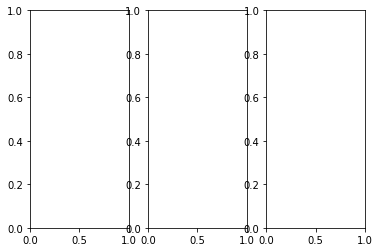

In [76]:
## model
gam = LinearGAM(s(0) + s(1) + f(2))
gam.gridsearch(X, y)


## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    print(i)
    print(XX[:, i])
    print(gam.partial_dependence(term=i, X=XX))
    break
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);